# HR Dataset - Statistics Review

## Explore the data

The data set we will use for this exercise comes from a Kaggle challenge and is often used for predictive analytics, namely to predict why the best and most experienced employees tend to leave the company.  We won't be using it for any predictive purposes here, but will instead use this data set to review many of the concepts explored in the Statistical Inference lectures.

This data contains fields for various measures of employee performance and reported satisfaction levels, as well as categorical variables for events and salary level.  For now, just explore the data a bit to get a general idea of what is going on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
# print first rows
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# print info, we have no nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# describe numeric columns
# satisfaction_level and last_evaluation seems percentages
# work_accident, left and promotion are booleans
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# describe object columns and print unique values
print(df[['sales', 'salary']].describe())
print(df.sales.unique())
print(df.salary.unique())

        sales salary
count   14999  14999
unique     10      3
top     sales    low
freq     4140   7316
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


## Probability, Expectation Values, and Variance

The concepts of probability, expectation values, and variance are the bedrock of statistical inference.  Let's begin by employing some of these concepts to see if we can find some interesting paths to go down which may provide some insight into the inner workings of this company.

1. What is the probability that a randomly selected employee left the company?  What about experienced a work accident?  Also compute the probability that a randomly selected employee left the company and experienced a work accident.
1. Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.  Compare these results to the same percentiles for those that did not leave.  What can you say about the results?
1. Compute the variance and standard deviation of hours worked.
1. Compare the variance between the satisfaction levels of employees who left versus those who stayed.  Which is larger?  What does this mean?
1. Compute the mean satisfaction level for each salary category.  Comment on your results.
1. Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.  In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$
1. What can you say about your results in part 6?
1. Repeat parts 6 and 7 for 
$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$
1. What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee?  Comment on your results.
1. Suppose we were to pull a random sample of size 50 of employee satisfaction levels.  What would approximately be the mean of this sample?  What would be the mean of, say, 10 sets of random samples?  Demonstrate your assertions by writing some python code to do just that.


In [7]:
n_employees = len(df)
left = df.left.sum()
accident = df.Work_accident.sum()
accident_left = len(df[(df['Work_accident'] == 1) & (df['left'] == 1)])

# probability that a randomly selected employee left the company
print(left/n_employees)
# probability that experienced a work accident
print(accident/n_employees)
# probability that a randomly selected employee left the company and experienced a work accident
print(accident_left/n_employees)

0.2380825388359224
0.1446096406427095
0.01126741782785519


In [8]:
# Creating two dataframes, one for employees who left and one for those who stayed
df_left = df[df['left'] == 1]
df_stayed = df[df['left'] == 0]

# Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.
print('Employees who left 25th, 50th and 90th percentile: {}, {}, {}'
      .format(df_left.satisfaction_level.quantile(0.25),
              df_left.satisfaction_level.quantile(0.5),
              df_left.satisfaction_level.quantile(0.9)))
# Compare these results to the same percentiles for those that did not leave. What can you say about the results?
print('Employees who stayed 25th, 50th and 90th percentile: {}, {}, {}'
      .format(df_stayed.satisfaction_level.quantile(0.25),
              df_stayed.satisfaction_level.quantile(0.5),
              df_stayed.satisfaction_level.quantile(0.9)))

Employees who left 25th, 50th and 90th percentile: 0.13, 0.41, 0.84
Employees who stayed 25th, 50th and 90th percentile: 0.54, 0.69, 0.94


There seems to be a difference but before we draw any conclusion we would need to perform a hypothesis test:

In [9]:
# Compute the variance and standard deviation of hours worked.
print(df.average_montly_hours.var())
print(df.average_montly_hours.std())

2494.313174809979
49.943099371284305


In [10]:
# Compare the variance between the satisfaction levels of employees who left versus those who stayed.
# Which is larger? What does this mean?
print(df_left.satisfaction_level.var())
print(df_stayed.satisfaction_level.var())

0.06966085873834325
0.04713404022655909


The variance in the satisfaction levels is larger for employees who left, so the satisfaction level for this employees is more spread out around the mean. This may indicate that the employees leaving the company have a level of satisfaction more variable than those who stay.

In [11]:
# Compute the mean satisfaction level for each salary category. Comment on your results.
df.groupby('salary').satisfaction_level.mean()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

The satisfaction level increases with the salary, as expected. It seems though to be a more sensible difference between low and medium than medium and high salaries, but again we would need to test to see if the difference is significant.

In [12]:
# Given an employees salary level (low, medium, or high), calculate the probability that
# they worked more than two standard deviations of the average monthly hours across all groups.
# In other words, compute P(hours > 2*sigma|salary) = P(salary|hours > 2*\sigma)*P(hours > 2*sigma)/P(salary)

# Creating a dataset for each salary level
df_low = df[df['salary'] == 'low']
df_medium = df[df['salary'] == 'medium']
df_high = df[df['salary'] == 'high']

# And one for employees who have worked more than two std above
sigma_hours = df.average_montly_hours.mean() + 2*df.average_montly_hours.std()
df_above = df[df['average_montly_hours'] > sigma_hours]
P_hours = len(df_above) / n_employees

for d, level in zip([df_low, df_medium, df_high], ['low', 'medium', 'high']):
    P_salary = len(d) / n_employees
    P_salary_hours = len(df_above[df_above['salary'] == level]) / len(df_above)
    P = (P_salary_hours * P_hours) / P_salary
    
    P_hours_salary = len(d[d['average_montly_hours'] > sigma_hours]) / len(d)
    print('{} salary level probability: {:.5f}, {:.5f}'.format(level, P, P_hours_salary))

low salary level probability: 0.01353, 0.01353
medium salary level probability: 0.00900, 0.00900
high salary level probability: 0.00162, 0.00162


**What can you say about your results in part 6?**

There seems to be a clear trend and difference between the probability that an employee who worked more time is in a given salary level: the employee is more probable to be found in low and medium salary levels than high. This difference, though it seems quite marked, should be verified through a test.

In [13]:
# Repeat parts 6 and 7 for P(left|salary) = P(salary|left)*P(left)/P(salary)

P_left = len(df_left) / n_employees

for d, level in zip([df_low, df_medium, df_high], ['low', 'medium', 'high']):
    P_salary = len(d) / n_employees
    P_salary_left = len(df_left[df_left['salary'] == level]) / len(df_left)
    P = (P_salary_left * P_left) / P_salary
    
    P_left_salary = len(d[d['left'] == 1]) / len(d)
    print('{} salary level probability: {:.5f}, {:.5f}'.format(level, P, P_left_salary))

low salary level probability: 0.29688, 0.29688
medium salary level probability: 0.20431, 0.20431
high salary level probability: 0.06629, 0.06629


As above the probability that an employee left the company given a certain salary level is higher for low and medium salary levels than for high ones.

In [112]:
# What is the odds ratio of an employee with a high salary getting a promotion
# within the past five years versus a low salary employee? Comment on your results.

p_high = df_high.promotion_last_5years.value_counts() / len(df_high)
p_low = df_low.promotion_last_5years.value_counts() / len(df_low)

print(p_high)
print(p_low)
print((p_high[1] / p_high[0]) / (p_low[1] / p_low[0]))

0    0.941795
1    0.058205
Name: promotion_last_5years, dtype: float64
0    0.990979
1    0.009021
Name: promotion_last_5years, dtype: float64
6.78891923527


The probability is sensibly higher for high salary level than low.

I think this is in part explained because if you are in a high salary level you had to get there by being promoted, instead if you are in a low level there is some chance that you are a newly arrived employee and you couldn't have got a promotion yet.

**Suppose we were to pull a random sample of size 50 of employee satisfaction levels.**

1. What would approximately be the mean of this sample? Somewhere near the mean of the entire dataset, but not that near because the sample size isn't that big.
2. What would be the mean of, say, 10 sets of random samples? Closer to the mean of the dataset because we have taken more samples, even the same size of each sample hasn't changed.

In [15]:
import random

In [16]:
# Demonstrate your assertions by writing some python code to do just that.

random.seed(7)
size = 50
s = random.sample(range(0, n_employees), size)
print('Dataset mean: {}\nSample mean: {}'.format(df.satisfaction_level.mean(), df.iloc[s].satisfaction_level.mean()))

Dataset mean: 0.6128335222348166
Sample mean: 0.5707999999999999


In [17]:
random.seed(7)

size = 50
n_samples = 10
mean = 0

for i in range(n_samples):
    s = random.sample(range(0, n_employees), size)
    mean += df.iloc[s].satisfaction_level.mean()
    
mean = mean / n_samples
print('Dataset mean: {}\nMean of sample means: {}'.format(df.satisfaction_level.mean(), mean))

Dataset mean: 0.6128335222348166
Mean of sample means: 0.6120599999999999


## Distributions and The Central Limit Theorem
### The Bernoulli Distribution
Bernoulli distributions are the result of a random variable with a binary outcome, like a coin flip or medical test giving a positive or negative result.  Typically we represent the outcomes of a Bernoulli Random variable $X$ of only taking values of 0 or 1, with probabilities $p$ and $1 - p$ respectively, mean $p$, variance $p(1 - p)$, and PMF given by

$$ P(X = x) = p^x (1 - p)^{1 - x} $$

Where $x$ is the outcome and $p$ is the probability of the positive outcome (1).

Bernoulli random variables crop up very often in statistical analysis &mdash; most often in the form of Binomial trials, or, as a sum of independent Bernoulli variables with PMF given by 
$$ P(X = x) = {n \choose x} p^x (1 - p)^{n - x} $$
where
$$ {n \choose x} = \frac{n!}{x!(n - x)!} $$
In this exercise you'll take a look at the HR data and apply these concepts to gain some insight.

Using the HR data, answer the following.
1. Which variables in the HR data can be said to be Bernoulli random variables?
2. For the variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x = 1)$ result, where $k$ is a placeholder for each variable.
3. Compute the variance of each of the variables in part 2 using $p_k$ as described above.
4. For each of the k variables, compute the probability of randomly selecting 3500 employees with a positive result.  Comment on your answer.
5. For each of the k variables, compute the probability of randomly selecting 3500 **or less** with a positive result.  Comment on your answer.
6. Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.  Comment on your results.

In [18]:
from scipy import stats

**Which variables in the HR data can be said to be Bernoulli random variables?**

I think these variables are good candidates:

1. Work_accident
1. left
1. promotion_last_5years

In [19]:
# For the variables you identified in part 1, compute the probabilities p_k, of each having a positive (x = 1) result,
# where k is a placeholder for each variable.

bernoulli = ['Work_accident', 'left', 'promotion_last_5years']

for var in bernoulli:
    print('probability for {}: {:.5f}'.format(var, df[var].sum() / n_employees))

probability for Work_accident: 0.14461
probability for left: 0.23808
probability for promotion_last_5years: 0.02127


In [20]:
# Compute the variance of each of the variables in part 2 using p_k as described above.

for var in bernoulli:
    p = df[var].sum() / n_employees
    print('variance for {}: {:.5f}'.format(var, p*(1-p)))

variance for Work_accident: 0.12370
variance for left: 0.18140
variance for promotion_last_5years: 0.02082


In [21]:
# For each of the k variables, compute the probability of randomly selecting 3500 employees with a positive result.
# Comment on your answer.

x = 3500

for var in bernoulli:
    p = df[var].sum() / n_employees
    print('PMF for {}: {:.5f}'.format(var, stats.binom.pmf(x, n_employees, p)))

PMF for Work_accident: 0.00000
PMF for left: 0.00304
PMF for promotion_last_5years: 0.00000


In [22]:
# For each of the k variables, compute the probability of randomly selecting 3500 or less with a positive result.
# Comment on your answer.

x = 3500

for var in bernoulli:
    p = df[var].sum() / n_employees
    print('CDF for {}: {:.5f}'.format(var, stats.binom.cdf(x, n_employees, p)))

CDF for Work_accident: 1.00000
CDF for left: 0.08803
CDF for promotion_last_5years: 1.00000


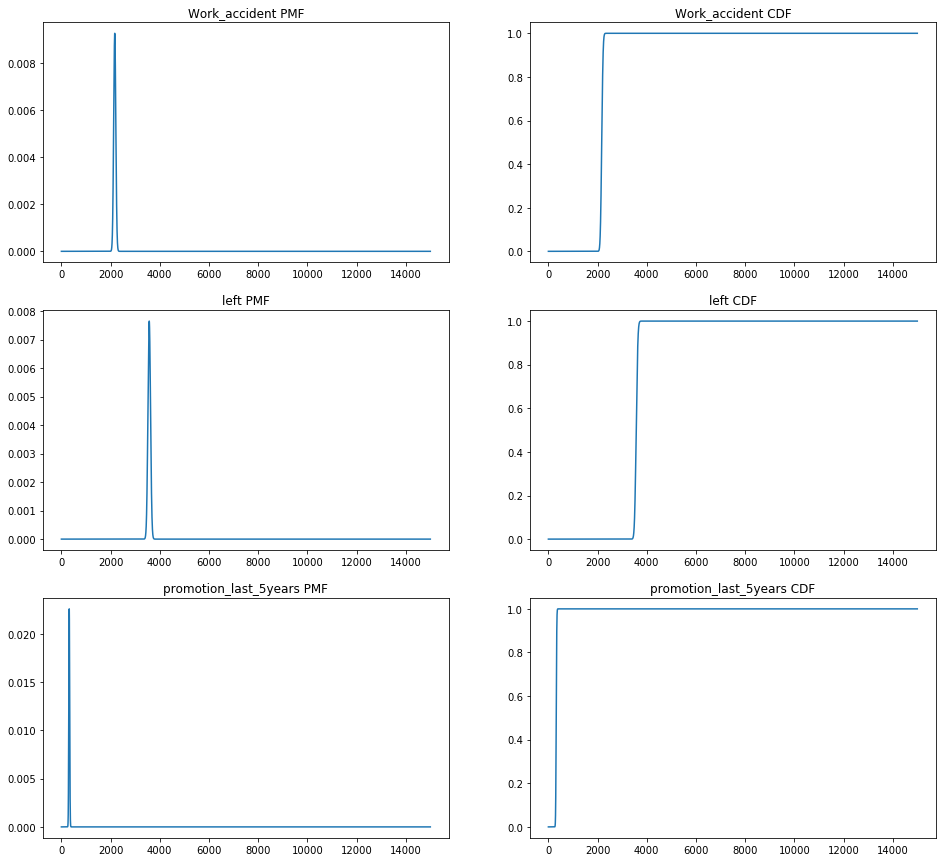

In [23]:
# Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.
# Comment on your results.

x = np.arange(0, n_employees)
fig, ax = plt.subplots(3, 2, figsize=(16, 15))
i = j = 0

for var in bernoulli:
    p = df[var].sum() / n_employees
    ax[i, 0].plot(x, stats.binom.pmf(x, n_employees, p))
    ax[i, 0].set_title(var +' PMF')
    ax[i, 1].plot(x, stats.binom.cdf(x, n_employees, p))
    ax[i, 1].set_title(var + ' CDF')
    i += 1

### The Normal Distribution
The Normal distribution (or sometimes called the Bell Curve or Gaussian) is by far the most prevalent and useful distribution in any field that utilizes statistical techniques.  In fact, in can be shown that the means of random variables sampled repeatedly from **any** distribution eventually form a normal given a sufficiently large sample size.

A normal distribution is characterized by the PDF given by
$$p(x|\mu,\sigma) = \frac{1}{\sqrt{(2\pi\sigma^2)}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

where $\mu$ is the mean and $\sigma^2$ is the variance, thus the distribution is characterized by mean and variance alone.  In this exercise, you'll examine some of the variables in the HR dataset and construct some normal distributions approximating them.

Using the HR data, answer the following

1. Which variables may be approximately normal?
2. For the variables in part 1, plot some histograms.
3. Compute the mean and variance for each of the variables used in parts 1 and 2.
4. Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part one.  Are they well approximated by normals?

**Which variables may be approximately normal?**

1. satisfaction_level
1. last_evaluation
1. number_project
1. average_montly_hours

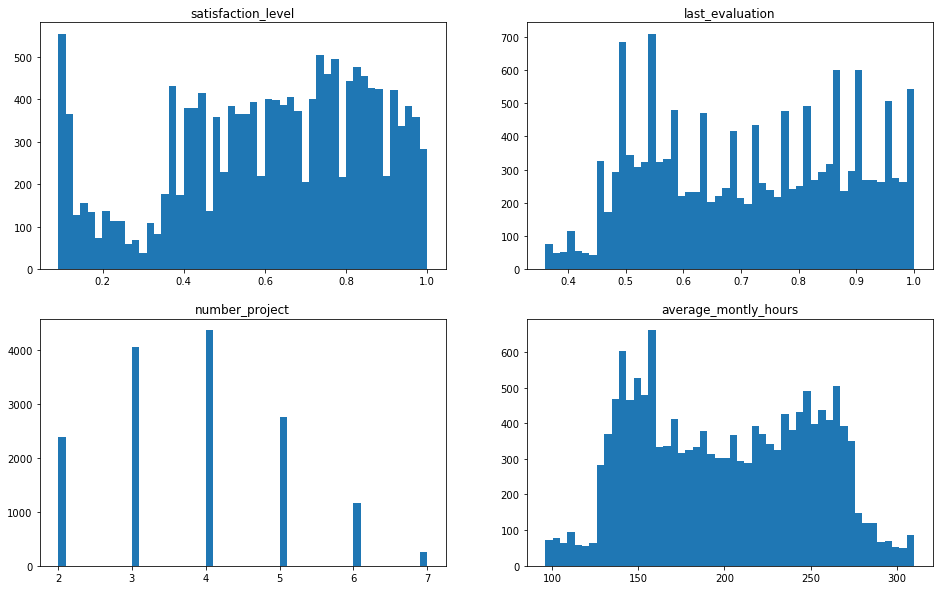

In [24]:
# For the variables in part 1, plot some histograms.

normal = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours']

fig, ax = plt.subplots(2, 2, figsize=(16, 10))
i = j = 0
for var in normal:
    if j == 2:
        i += 1
        j = 0
    ax[i, j].hist(df[var], bins=50)
    ax[i, j].set_title(var)
    j += 1

In [25]:
# Compute the mean and variance for each of the variables used in parts 1 and 2.

for var in normal:
    print('{}\n\tmean = {:.5f}\n\tvariance = {:.5f}'.format(var, df[var].mean(), df[var].var()))

satisfaction_level
	mean = 0.61283
	variance = 0.06182
last_evaluation
	mean = 0.71610
	variance = 0.02930
number_project
	mean = 3.80305
	variance = 1.51928
average_montly_hours
	mean = 201.05034
	variance = 2494.31317


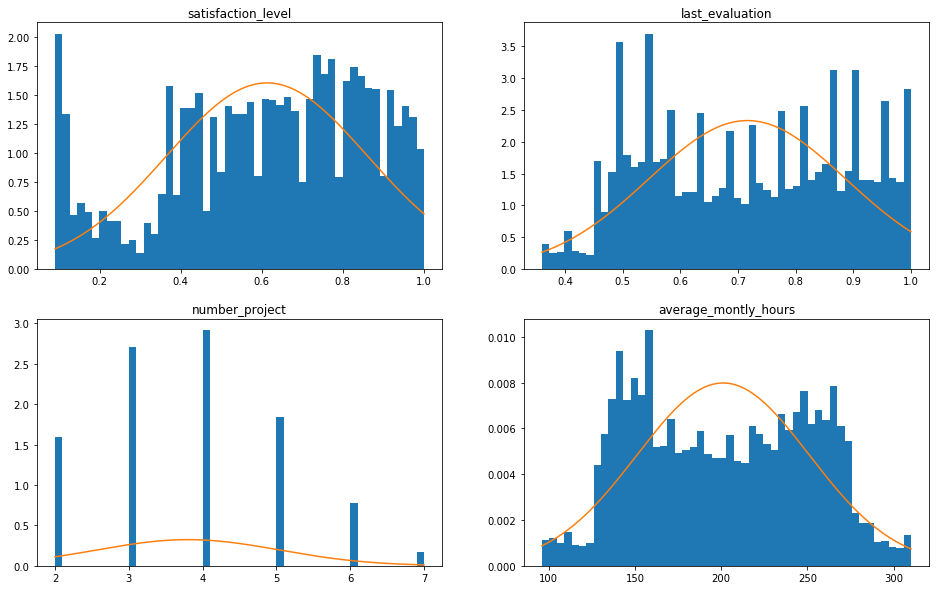

In [26]:
# Using the mean and variance in part 3, construct normal distributions for each
# and overlay them on top of the histograms you made in part one.
# Are they well approximated by normals?

fig, ax = plt.subplots(2, 2, figsize=(16, 10))
i = j = 0
for var in normal:
    x = np.linspace(min(df[var]), max(df[var]), 1000)
    Z = stats.norm.pdf(x, loc=df[var].mean(), scale=df[var].std())
    if j == 2:
        i += 1
        j = 0
    ax[i, j].hist(df[var], bins=50, normed=True)
    ax[i, j].set_title(var)
    ax[i, j].plot(x, Z)
    j += 1

### The Poisson Distribution
The Poisson distribution is very versatile but is typically used to model counts per unit time or space, such as the number of ad clicks or arriving flights, each per unit time. It has a PDF given by
$$ P(X = x, \lambda) = \frac{\lambda^x e^{-\lambda}}{x!} $$
where the mean and variance are both equal to $\lambda$

Using the HR data, answer the following.

1. What variables would be good candidates for modeling with a Poisson distribution?
2. For each variable in part 1, divide each by salary and fit a Poisson distribution to each.
3. For each salary level, compute the probability of obtaining at least the mean of each variable &mdash; regardless of salary level &mdash; by using the Poisson distributions you constructed in part 2.  Comment on your results.

**What variables would be good candidates for modeling with a Poisson distribution?**

1. time_spend_company

In [113]:
# For each variable in part 1, divide each by salary and fit a Poisson distribution to each.

poisson = ['time_spend_company']

for var in poisson:
    for level in ['low', 'medium', 'high']:
        mu = df[df['salary'] == level][var].mean()
        fit = stats.poisson(mu)
        print('{} {} mean and Poisson fit mean: {:.5f}, {:.5f}'.format(var, level, mu, fit.mean()))

time_spend_company low mean and Poisson fit mean: 3.43822, 3.43822
time_spend_company medium mean and Poisson fit mean: 3.52901, 3.52901
time_spend_company high mean and Poisson fit mean: 3.69281, 3.69281


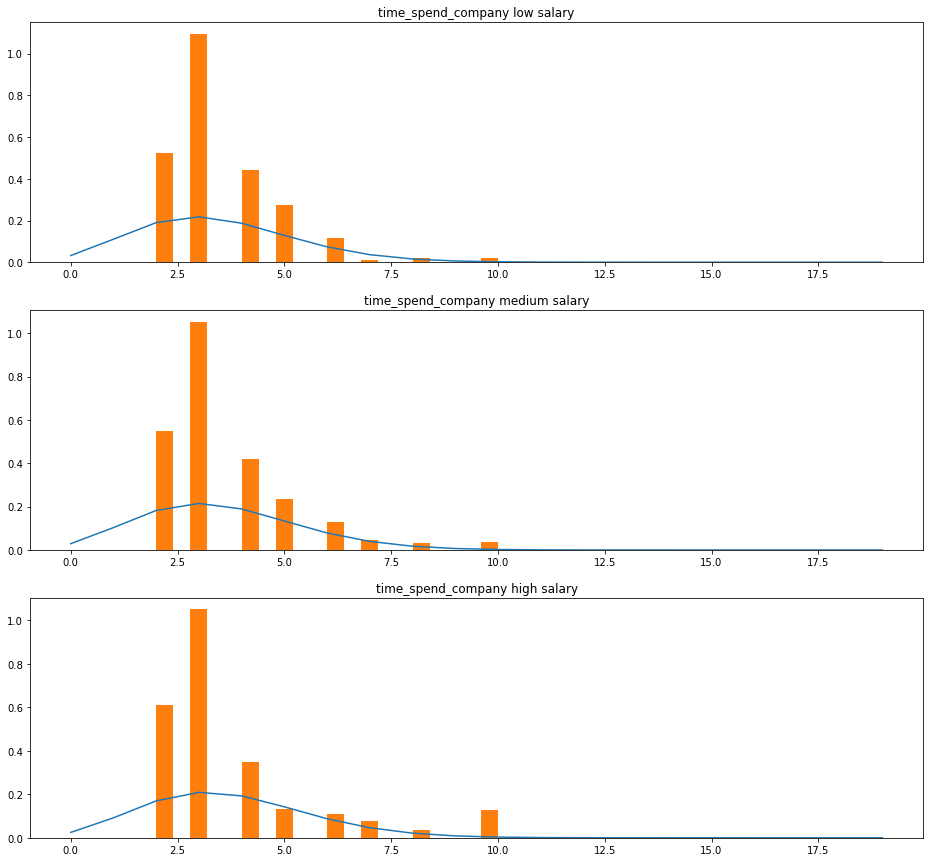

In [27]:
x = np.arange(0, 20)
fig, ax = plt.subplots(3, 1, figsize=(16, 15))
i = 0

for var in poisson:
    for level in ['low', 'medium', 'high']:
        mu = df[df['salary'] == level][var].mean()
        ax[i].set_title(var + ' ' + level + ' salary')
        ax[i].plot(x, stats.poisson.pmf(x, mu))
        ax[i].hist(df[df['salary'] == level][var], bins=20, normed=True)
        i += 1

In [115]:
# For each salary level, compute the probability of obtaining at least the mean of each variable
# regardless of salary level by using the Poisson distributions you constructed in part 2.
# Comment on your results.

for var in poisson:
    global_mean = df[var].mean()
    # print(global_mean)
    for level in ['low', 'medium', 'high']:
        mu = df[df['salary'] == level][var].mean()
        # print(mu, df[df['salary'] == level][var].median())
        print('{} {} salary level probability is {:.5f}'.format(var, level, stats.poisson.sf(global_mean, mu)))

time_spend_company low salary level probability is 0.44998
time_spend_company medium salary level probability is 0.46961
time_spend_company high salary level probability is 0.50434


### The Central Limit Theorem
The Central Limit Theorem is perhaps one of the most remarkable results in statistics and mathematics in general.  In short, it says that the distribution of means of independent random variables, sampled from **any** distribution, tends to approach a normal distribution as the sample size increases.

An example of this would be taking a pair of dice, rolling them, and recording the mean of each result.  The Central Limit Theorem states, that after enough rolls, the distribution of the means will be approximately normal.  Stated formally, the result is
    $$ \bar{X_n} \sim N(\mu, \sigma^2/n) = \frac{\sqrt{n}}{\sigma \sqrt{2\pi}}e^{-n(\bar{X_n} - \mu)^2/\sigma^2}$$
In this exercise, you'll conduct some simulation experiments to explore this idea.

Using the HR data, answer the following.
1. Choose two variables which may be good candidates to test this theorem.
2. Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean.  Repeat this 1000 times for each variable.
3. Plot a histogram for each variable used in part 2.  Comment on your results.
4. Repeat parts 2-3 for `n = 100`, `n = 500`, and `n = 1000`.  Comment on your results.
5. Overlay an normal curve on your `n = 1000` plots, using the mean and variance computed from the data.  Comment on your results.

In [29]:
# Choose two variables which may be good candidates to test this theorem.

central = ['average_montly_hours', 'last_evaluation']

In [130]:
# Using the variables chosen in part 1, randomly select a set of n = 10 samples and take the mean.
# Repeat this 1000 times for each variable.

def make_samples(n_samples, size, seed):
    res = {}

    for var in central:
        random.seed(seed)
        mean = []
        for i in range(n_samples):
            s = random.sample(range(0, n_employees), size)
            mean.append(df.iloc[s][var].mean())
        
        # from solution using a list comprehension:
        # mean = [df[var].sample(size).mean() for i in range(n_samples)]
        
        res[var] = mean
    
    return res

sampsize10 = make_samples(1000, 10, 7)

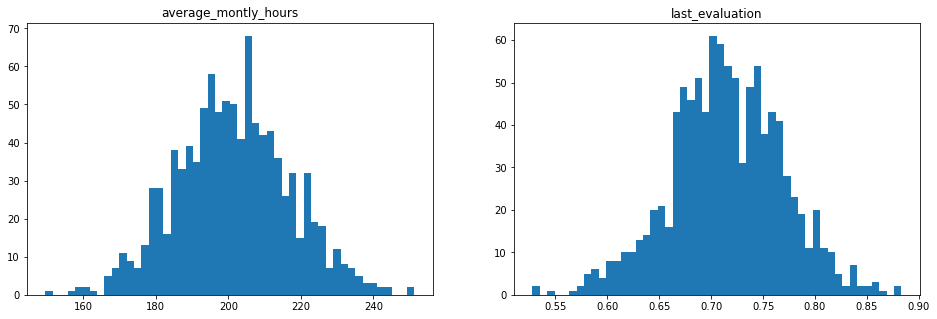

In [132]:
# Plot a histogram for each variable used in part 2. Comment on your results.

def plot_samples(samples):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    i = 0

    for var in central:
        ax[i].set_title(var)
        ax[i].hist(samples[var], bins=50)
        i += 1

plot_samples(sampsize10)

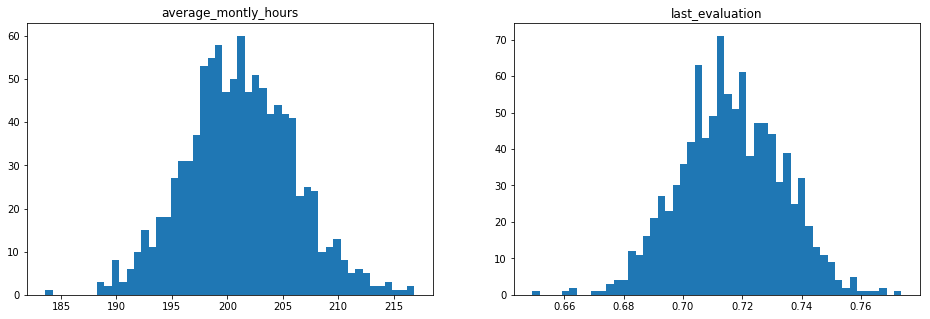

In [32]:
# Repeat parts 2-3 for n = 100, n = 500, and n = 1000. Comment on your results.

sampsize100 = make_samples(1000, 100, 7)
plot_samples(sampsize100)

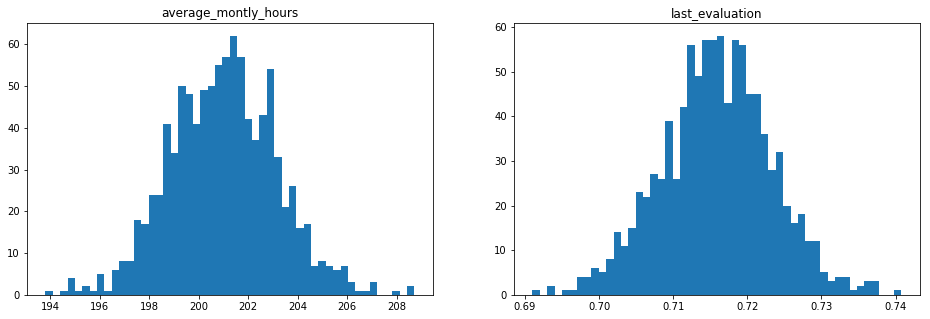

In [33]:
sampsize500 = make_samples(1000, 500, 7)
plot_samples(sampsize500)

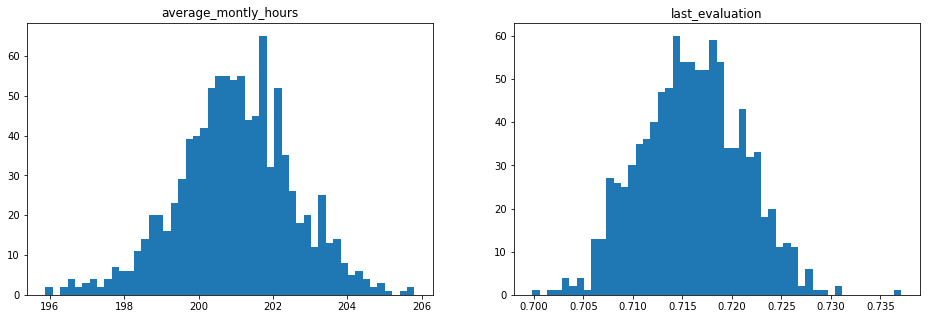

In [34]:
sampsize1000 = make_samples(1000, 1000, 7)
plot_samples(sampsize1000)

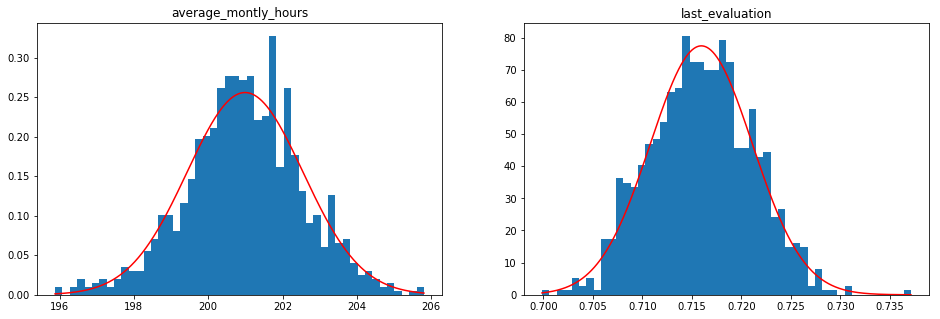

In [137]:
# Overlay an normal curve on your n = 1000 plots, using the mean and variance computed from the data.
# Comment on your results.

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
i = 0

for var in central:
    x = np.linspace(min(sampsize1000[var]), max(sampsize1000[var]), 1000)
    ax[i].set_title(var)
    ax[i].hist(sampsize1000[var], bins=50, normed=True)
    # from solutions: divide by sqrt(1000) to find the std of a sampled distribution!
    # but if I do it results are not so good!
    ax[i].plot(x, stats.norm.pdf(x, loc=pd.Series(sampsize1000[var]).mean(), scale=pd.Series(sampsize1000[var]).std()), color='red')
    i += 1

## Hypothesis Testing
Hypothesis testing is essentially using the data to answer questions of interest.  For example, does a new medication provide any benefit over placebo?  Or is a subset of the population disproportionately more susceptible to a particular disease?  Or is the difference between two companies profits' significant or due to chance alone?

Before doing some hypothesis testing on the HR data, recall that hypothesis typically come in pairs of the form $H_0$, called the null hypothesis, versus $H_a$, called the alternative hypothesis.  The null hypothesis represents the "default" assumption -- that a medication has no effect for example, while the alternative hypothesis represents what exactly we are looking to discover, in the medication case, whether it provides a significant benefit.  Another common case is testing the difference between two means.  Here, the null hypothesis is that there is no difference between two population means, whereas the alternative hypothesis is that there is a difference.  Stated more precisely
$$H_0: \mu_1 - \mu_2 = 0$$
$$H_a: \mu_1 - \mu_2 \ne 0$$

Hypotheses are usually tested by constructing a confidence interval around the test statistic and selecting a "cut-off" significance level denoted $\alpha$.  A typical $\alpha$ significance is 0.05 and is often called a "p-value".  If a test produces a p-value of $\alpha$ or below, then the null hypothesis can be rejected, strengthening the case of the alternative hypothesis.  It is very important to remember that hypothesis testing can only tell you if your hypothesis is statistically significant -- this does **not** mean that your result may be scientifically significant which requires much more evidence.

In this exercise you'll explore the HR data more and test some hypothesis.

Using the HR data, answer the following.

1. Compute a confidence interval for satisfaction levels, at the 95% confidence level, of employees who left the company and those who didn't.  Do this using both a t distribution and a normal.  Comment on your results.
2. Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not.  If significant, is the mean difference?  Comment on your results.  (Hint: Do the two populations have equal variance?)
3. Fit a normal curve to each group in part 2 and put them on the same plot next to each other.  Comment on your results.
4. Test the hypothesis that the satisfaction level between each salary group, denoted k, differs signicantly from the mean.  Namely
    - $H_0: \mu - \mu_k = 0$
    - $H_a: \mu - \mu_k \ne 0$
5. How would you interpret your results in part 4?
6. Generate plots for part 4 as you did in part 3.  What conclusions can you draw from the plot?
7. Repeat parts 4-6 on a hypothesis of your choosing.
8. Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good).  Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

In [150]:
# Compute a confidence interval for satisfaction levels, at the 95% confidence level,
# of employees who left the company and those who didn't. 
# Do this using both a t distribution and a normal. Comment on your results.

import statsmodels.stats.api as sm

# checking mean and variance
print('Employees who left mean and variance are {:.5f} and {:.5f}'.
      format(df_left.satisfaction_level.mean(),
             df_left.satisfaction_level.var()))
print('Employees who stayed mean and variance are {:.5f} and {:.5f}'.
      format(df_stayed.satisfaction_level.mean(),
             df_stayed.satisfaction_level.var()))

# using normal distribution
print('\nNormal Distribution\n')

# df_left_norm_confidence = df_left.satisfaction_level.mean() + df_left.satisfaction_level.std() / np.sqrt(len(df_left)) * np.array(stats.norm.ppf([0.025, 0.975]))
# print('Employees who left 95% confidence interval: {}'.format(df_left_norm_confidence))
# print('Employees who left 95% confidence interval: {}'.
#       format(stats.norm.interval(0.95,
#                                  df_left.satisfaction_level.mean(),
#                                  df_left.satisfaction_level.std()/np.sqrt(len(df_left)))))
print('Employees who left 95% confidence interval: {}'.format(sm.DescrStatsW(df_left.satisfaction_level).zconfint_mean(alpha=0.05)))

# df_stayed_norm_confidence = df_stayed.satisfaction_level.mean() + df_stayed.satisfaction_level.std() / np.sqrt(len(df_stayed)) * np.array(stats.norm.interval(0.95))
# print('Employees who stayed 95% confidence interval: {}'.format(df_stayed_norm_confidence))
# print('Employees who stayed 95% confidence interval: {}'.
#       format(stats.norm.interval(0.95,
#                                  df_stayed.satisfaction_level.mean(),
#                                  df_stayed.satisfaction_level.std()/np.sqrt(len(df_stayed)))))
print('Employees who stayed 95% confidence interval: {}'.format(sm.DescrStatsW(df_stayed.satisfaction_level).zconfint_mean(alpha=0.05)))

# using t distribution
print('\nT Distribution with n={}\n'.format(n_employees))

# df_left_t_confidence = df_left.satisfaction_level.mean() + df_left.satisfaction_level.std() / np.sqrt(len(df_left)) * np.array(stats.t.interval(0.95, n_employees))
# print('Employees who left 95% confidence interval: {}'.format(df_left_t_confidence))
# print('Employees who left 95% confidence interval: {}'.
#       format(stats.t.interval(0.95,
#                               n_employees,
#                               df_left.satisfaction_level.mean(),
#                               df_left.satisfaction_level.std()/np.sqrt(len(df_left)))))
print('Employees who left 95% confidence interval: {}'.format(sm.DescrStatsW(df_left.satisfaction_level).tconfint_mean(alpha=0.05)))

# df_stayed_t_confidence = df_stayed.satisfaction_level.mean() + df_stayed.satisfaction_level.std() / np.sqrt(len(df_stayed)) * np.array(stats.t.interval(0.95, n_employees))
# print('Employees who stayed 95% confidence interval: {}'.format(df_stayed_t_confidence))
# print('Employees who stayed 95% confidence interval: {}'.
#       format(stats.t.interval(0.95,
#                               n_employees,
#                               df_stayed.satisfaction_level.mean(),
#                               df_stayed.satisfaction_level.std()/np.sqrt(len(df_stayed)))))
print('Employees who stayed 95% confidence interval: {}'.format(sm.DescrStatsW(df_stayed.satisfaction_level).tconfint_mean(alpha=0.05)))

Employees who left mean and variance are 0.44010 and 0.06966
Employees who stayed mean and variance are 0.66681 and 0.04713

Normal Distribution

Employees who left 95% confidence interval: (0.43144140722566204, 0.44875461629716118)
Employees who stayed 95% confidence interval: (0.66282915756106575, 0.67079002339798233)

T Distribution with n=14999

Employees who left 95% confidence interval: (0.43143847133171009, 0.44875755219111313)
Employees who stayed 95% confidence interval: (0.66282873590383407, 0.67079044505521401)


The results are almost the same because for $n \rightarrow \infty$ the t distribution tends to the normal. 

In [101]:
# Use a t-test to test the hypothesis that employees who left the company,
# had lower satisfaction levels than those who did not. If significant, is the mean difference?
# Comment on your results. (Hint: Do the two populations have equal variance?)

print('Test assuming equal variance: {}'.format(stats.ttest_ind(df_left.satisfaction_level,
                                                                df_stayed.satisfaction_level,
                                                                equal_var=True)))
print('Test assuming different variance: {}'.format(stats.ttest_ind(df_left.satisfaction_level,
                                                                   df_stayed.satisfaction_level,
                                                                   equal_var=False)))

Test assuming equal variance: Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)
Test assuming different variance: Ttest_indResult(statistic=-46.636414352775716, pvalue=0.0)


The difference is significant, and since the mean of employees who left is lower we can say that the hypothesis that they had lower satisfaction level is statistically relevant (we have a two-tailed test but the p-value is very small in either case).

Also, the test is significant both considering the populations to have equal variance or not.

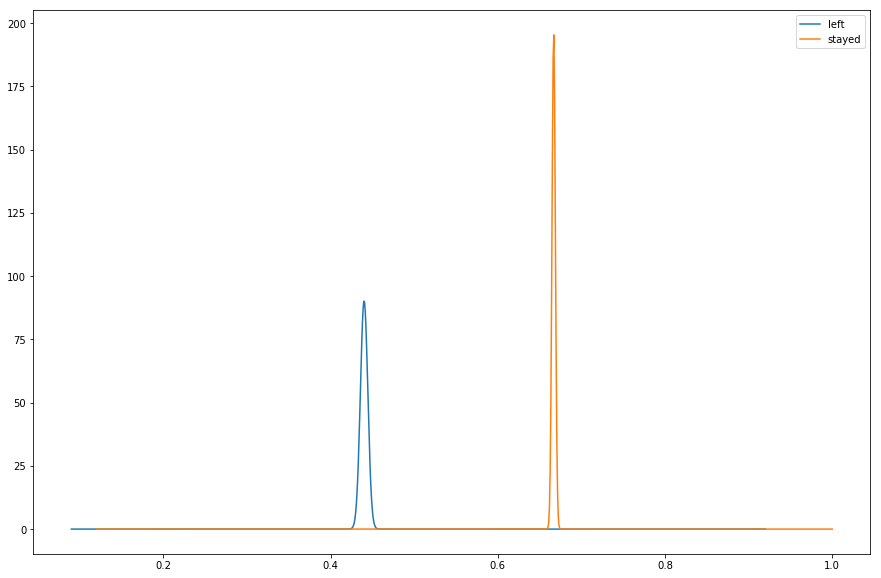

In [151]:
# Fit a normal curve to each group in part 2 and put them on the same plot next to each other. Comment on your results.

fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
x1 = np.linspace(df_left.satisfaction_level.min(), df_left.satisfaction_level.max(), 1000)
ax.plot(x1, stats.norm.pdf(x1, df_left.satisfaction_level.mean(), df_left.satisfaction_level.std() / np.sqrt(len(df_left))), label='left')
x2 = np.linspace(df_stayed.satisfaction_level.min(), df_stayed.satisfaction_level.max(), 1000)
ax.plot(x2, stats.norm.pdf(x2, df_stayed.satisfaction_level.mean(), df_stayed.satisfaction_level.std() / np.sqrt(len(df_stayed))), label='stayed')
ax.legend();

From the plots we can see that the peaks of the normal are far apart, thus backing up our test results.

In [103]:
# Test the hypothesis that the satisfaction level between each salary group, denoted k,
# differs signicantly from the mean. Namely
# H0:μ−μk=0H0:μ−μk=0 
# Ha:μ−μk≠0Ha:μ−μk≠0 

# print(df.satisfaction_level.mean())
# print(df_high.satisfaction_level.mean())
# print(df_medium.satisfaction_level.mean())
# print(df_low.satisfaction_level.mean())
# print(df.satisfaction_level.var())
# print(df_high.satisfaction_level.var())
# print(df_medium.satisfaction_level.var())
# print(df_low.satisfaction_level.var())

print('High level test: {}'.format(stats.ttest_1samp(df_high.satisfaction_level, df.satisfaction_level.mean())))
print('Medium level test: {}'.format(stats.ttest_1samp(df_medium.satisfaction_level, df.satisfaction_level.mean())))
print('Low level test: {}'.format(stats.ttest_1samp(df_low.satisfaction_level, df.satisfaction_level.mean())))

High level test: Ttest_1sampResult(statistic=3.8205997501861702, pvalue=0.00013974368695866474)
Medium level test: Ttest_1sampResult(statistic=2.9429521364929117, pvalue=0.0032625787024487714)
Low level test: Ttest_1sampResult(statistic=-4.0585381216022212, pvalue=4.9895149767038095e-05)


**How would you interpret your results in part 4?**

We can reject the null hypothesis for all three salary levels with $\alpha = 0.01$.

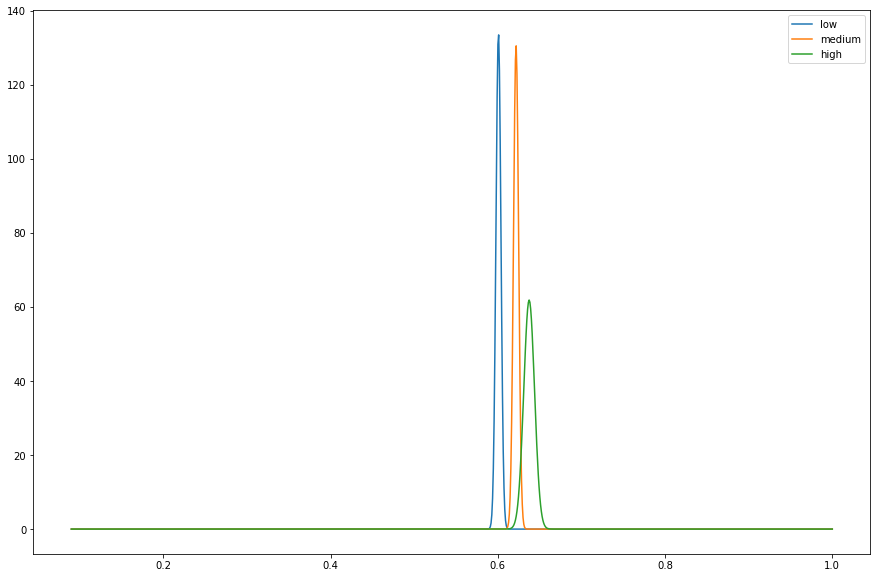

In [154]:
# Generate plots for part 4 as you did in part 3. What conclusions can you draw from the plot?

fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
# x1 = np.linspace(df.satisfaction_level.min(), df.satisfaction_level.max(), 1000)
# ax.plot(x1, stats.norm.pdf(x1, df.satisfaction_level.mean(), df.satisfaction_level.std() / np.sqrt(len(df))), label='all')
x2 = np.linspace(df_low.satisfaction_level.min(), df_low.satisfaction_level.max(), 1000)
ax.plot(x2, stats.norm.pdf(x2, df_low.satisfaction_level.mean(), df_low.satisfaction_level.std() / np.sqrt(len(df_low))), label='low')
x3 = np.linspace(df_medium.satisfaction_level.min(), df_medium.satisfaction_level.max(), 1000)
ax.plot(x3, stats.norm.pdf(x3, df_medium.satisfaction_level.mean(), df_medium.satisfaction_level.std() / np.sqrt(len(df_medium))), label='medium')
x4 = np.linspace(df_high.satisfaction_level.min(), df_high.satisfaction_level.max(), 1000)
ax.plot(x4, stats.norm.pdf(x4, df_high.satisfaction_level.mean(), df_high.satisfaction_level.std() / np.sqrt(len(df_high))), label='high')
ax.legend();

In this case the curves are not that far apart as in the previous case but they still seem reasonably distant.

In [105]:
# Repeat parts 4-6 on a hypothesis of your choosing.

# Last evaluation mean differs between people who left and people who stayed

print('Last evaluation mean and variance for employees who left: {}, {}'.format(df_left.last_evaluation.mean(),
      df_left.last_evaluation.var()))
print('Last evaluation mean and variance for employees who stayed: {}, {}'.format(df_stayed.last_evaluation.mean(),
      df_stayed.last_evaluation.var()))

print('Test assuming different variance: {}'.format(stats.ttest_ind(df_left.last_evaluation,
                                                                    df_stayed.last_evaluation,
                                                                    equal_var=False)))

Last evaluation mean and variance for employees who left: 0.7181125735088183, 0.03907475595110636
Last evaluation mean and variance for employees who stayed: 0.7154733986699274, 0.02624560592572043
Test assuming different variance: Ttest_indResult(statistic=0.72534234158918753, pvalue=0.46827496132319124)


We can't reject the null hypothesis, let's plot the data:

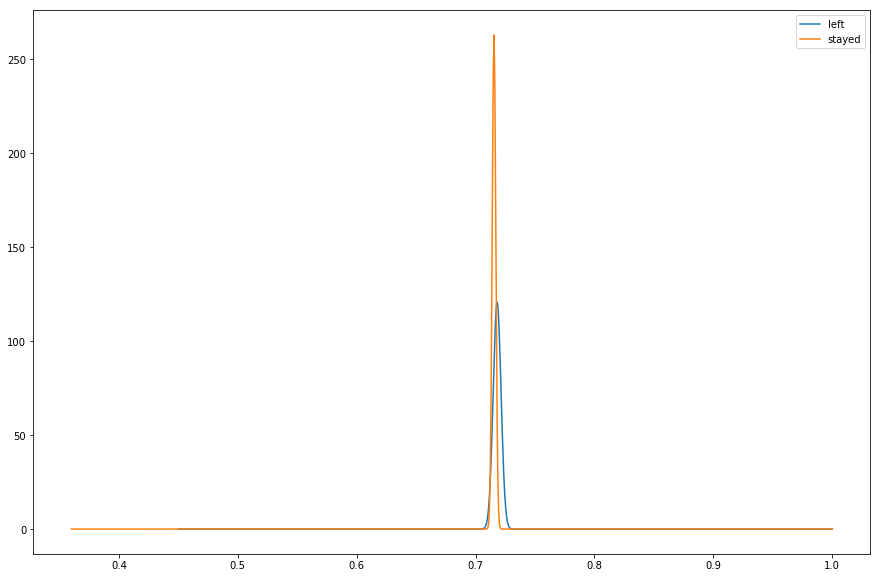

In [155]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
x1 = np.linspace(df_left.last_evaluation.min(), df_left.last_evaluation.max(), 1000)
ax.plot(x1, stats.norm.pdf(x1, df_left.last_evaluation.mean(), df_left.last_evaluation.std() / np.sqrt(len(df_left))), label='left')
x2 = np.linspace(df_stayed.last_evaluation.min(), df_stayed.last_evaluation.max(), 1000)
ax.plot(x2, stats.norm.pdf(x2, df_stayed.last_evaluation.mean(), df_stayed.last_evaluation.std() / np.sqrt(len(df_stayed))), label='stayed')
ax.legend();

Indeed the means seems very close!

In [77]:
# when it is false (thus more power is good). Compute the power for the
# hypothesis that the satisfaction level of high paid employees is different than
# that of medium paid employees using a t distribution.

import statsmodels.stats.power as smp

In [163]:
# From solution the size effect to use is high-medium divided by std of all the data:

effect_size = (df_high.satisfaction_level.mean() - df_medium.satisfaction_level.mean()) / df.satisfaction_level.std()

print(smp.TTestIndPower().solve_power(effect_size,
                                      nobs1=len(df_high),
                                      ratio=len(df_high)/len(df_medium),
                                      alpha=0.05,
                                      alternative='two-sided'))

# This is used in the solution but I don't understand the use of the number of employees who stayed as nobs1...
print(sm.TTestIndPower().power(effect_size, nobs1=len(df_stayed), ratio=len(df_high)/len(df_medium), alpha=0.05))

0.144046927349
0.770465439219


## Bootstrapping
Bootstrapping is an immensely useful technique in practice.  Very often you may find yourself in a situation where you want to compute some statistic, but lack sufficient data to do so.  Bootstrapping works as a remedy to this problem.

Recall that the bootstrapping algorithm breaks down as follows:
1. Sample n observations with replacement from the observed data resulting in one simulated complete data set. 
1. Take the statistic of the simulated data set
1. Repeat these two steps B times, resulting in B simulated statistics
1. These statistics are approximately drawn from the sampling distribution of the statistic of n observations
    - This is a lot like what you did when drawing many sample means

In this exercise you will implement this algorithm on the HR data.

Write a function that can perform bootrapping for the median of a set of n samples in the HR data set.  Test this function on the `satisfaction_level` with `n = 100` and `b = 100` and compare your results to the true median.  Also compute the standard deviation of the bootstrapped median.

In [73]:
def bootstrap(n, b, var):

    statistics = []

    for i in range(b):
        sample = pd.Series(np.random.choice(np.array(df[var]), size=n))
        statistics.append(sample.median())

    return pd.Series(statistics)

In [76]:
n = 100
b = 100
var = 'satisfaction_level'

sat_lvl_bootstrapped = bootstrap(n, b, var)

print('Bootstrapped samples median mean and variance: {:.5f}, {:.5f}'.format(sat_lvl_bootstrapped.mean(), sat_lvl_bootstrapped.std()))
print('True median: {:.5f}'.format(df[var].median()))

Bootstrapped samples median mean and variance: 0.64350, 0.03640
True median: 0.64000
